<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP3/ML_TP3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np

#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
attributes_spotify.iloc[1593:1600].head(7)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1593,1593,0.278,0.693,87705,0.5780,0.000002,0,0.1210,-11.129,1,0.1800,78.158,4.0,0.8510,0,"Icy, Creamy Ice Cream",Barney
1594,1594,0.995,0.471,82293,0.0148,0.934000,3,0.1810,-33.097,1,0.0558,102.271,3.0,0.1830,0,"Lyric Pieces, Book I Op. 12: I. Arietta",Edvard Grieg
1595,1595,0.915,0.277,295747,0.0156,0.006540,7,0.1480,-24.801,1,0.0482,117.119,3.0,0.0855,0,"String Quartet No. 4 in C Major, D. 46: II. An...",Franz Schubert
1596,1596,0.995,0.333,221173,0.0288,0.819000,1,0.0730,-31.367,1,0.0423,100.189,3.0,0.0857,0,"8 Fantasiestücke, Op.12 : 1. Des Abends",Robert Schumann
1597,1597,0.971,0.338,455307,0.0539,0.328000,9,0.1210,-21.863,0,0.0414,103.861,4.0,0.2050,0,"String Quartet No. 5 in C Major, Op. 29, ""Sere...",Wilhelm Stenhammar
1598,1598,0.953,0.156,458000,0.0230,0.338000,10,0.1650,-31.082,1,0.0445,140.715,4.0,0.0588,0,"Piano Quartet in E flat, Op.47: 3. Andante can...",Robert Schumann
1599,1599,0.993,0.294,621280,0.1420,0.912000,7,0.0673,-20.374,1,0.0388,94.296,4.0,0.1990,0,"Piano Sonata No. 18 in G Major, Op. 78, D. 894...",Franz Schubert


<Figure size 432x288 with 0 Axes>

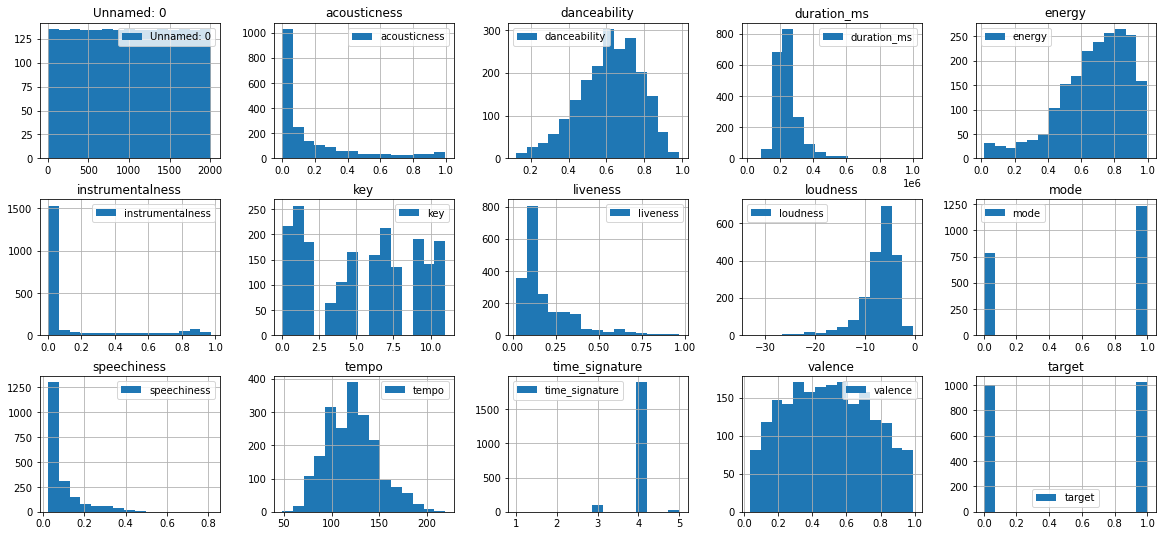

In [ ]:
#voy a chusmear el dataset

import matplotlib.pyplot as plt

plt.figure()
attributes_spotify.hist(legend=True, figsize=(20,9), layout=(3, 5), bins=15)
plt.show()

<Figure size 432x288 with 0 Axes>

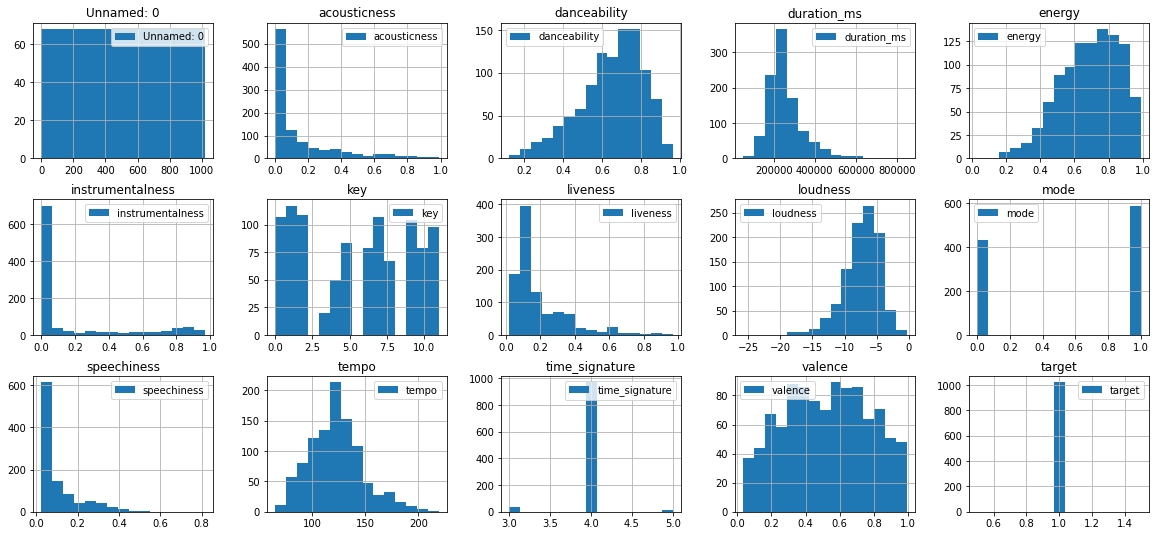

In [ ]:
# grafico por separado los histogramas de las que gustaron y las que no

import matplotlib.pyplot as plt

mask_like = attributes_spotify['target'] == 1

plt.figure()
attributes_spotify.loc[mask_like].hist(legend=True, figsize=(20,9), layout=(3, 5), bins=15)
plt.show()

<Figure size 432x288 with 0 Axes>

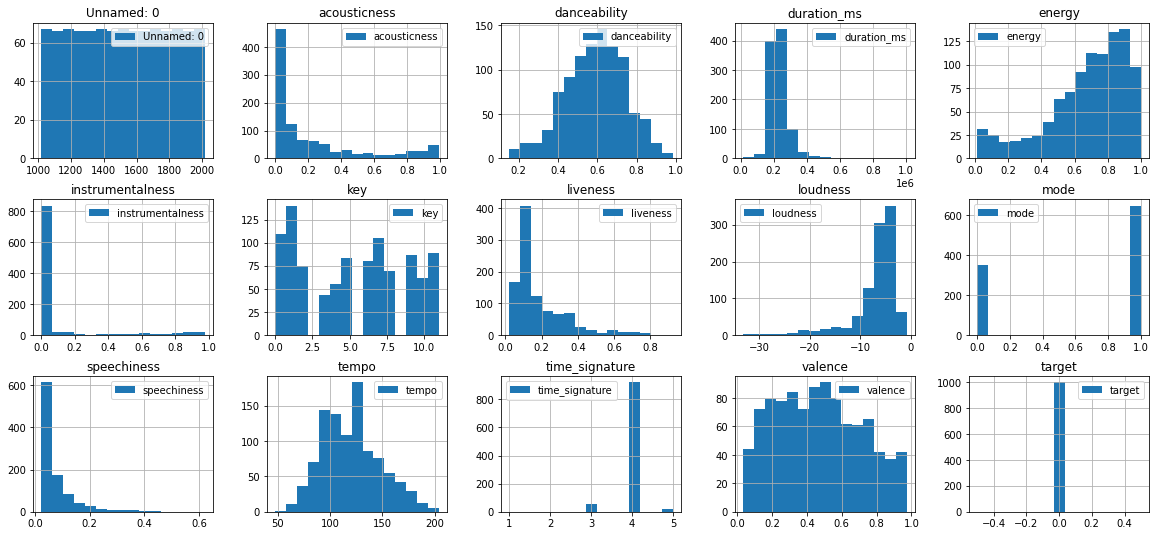

In [ ]:
# grafico por separado los histogramas de las que gustaron y las que no

import matplotlib.pyplot as plt

mask_unlike = attributes_spotify['target'] == 0

plt.figure()
attributes_spotify.loc[mask_unlike].hist(legend=True, figsize=(20,9), layout=(3, 5), bins=15)
plt.show()

Los histogramas no dicen mucho, ninguna de las targets se diferencia demasiado del dataset conjunto. Habría que normalizar las formas de los histogramas de cada target con respecto a la forma conjunta para encontrar mejor la diferencia.

<Figure size 432x288 with 0 Axes>

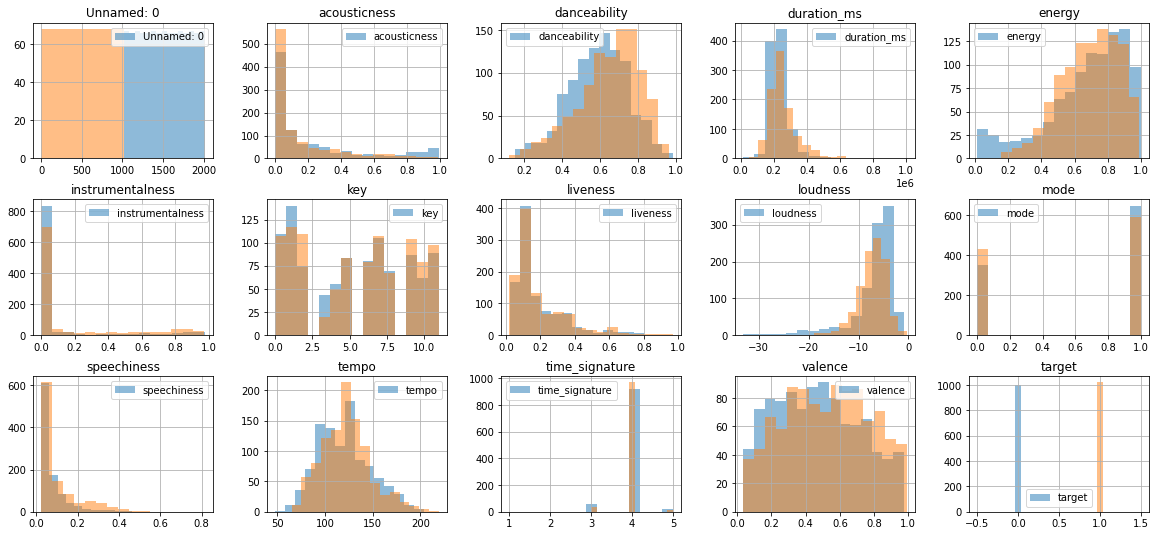

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

mask_like = attributes_spotify['target'] == 1
mask_unlike = attributes_spotify['target'] == 0

length=15
plt.figure()

axes = attributes_spotify.loc[mask_unlike].hist(legend=True, figsize=(20,9), layout=(3, 5), alpha=0.5, bins=15)

# axes = cancer_tissues.loc[mask_benign].hist(layout=(5,7), alpha=0.5, figsize=(20,9))

attributes_spotify.loc[mask_like].hist(ax=axes.ravel()[:length], alpha=0.5, bins=15)

plt.show()

Ahora si pude ver diferencias con esos histogramas solapados, sobre todo en danceability, duracion, energia, loudness y valencia. Quizas tambien en instrumentalness y speechiness. Probablemente debería comenzar con las categorías donde mas diferencia se ve.

<Figure size 432x288 with 0 Axes>

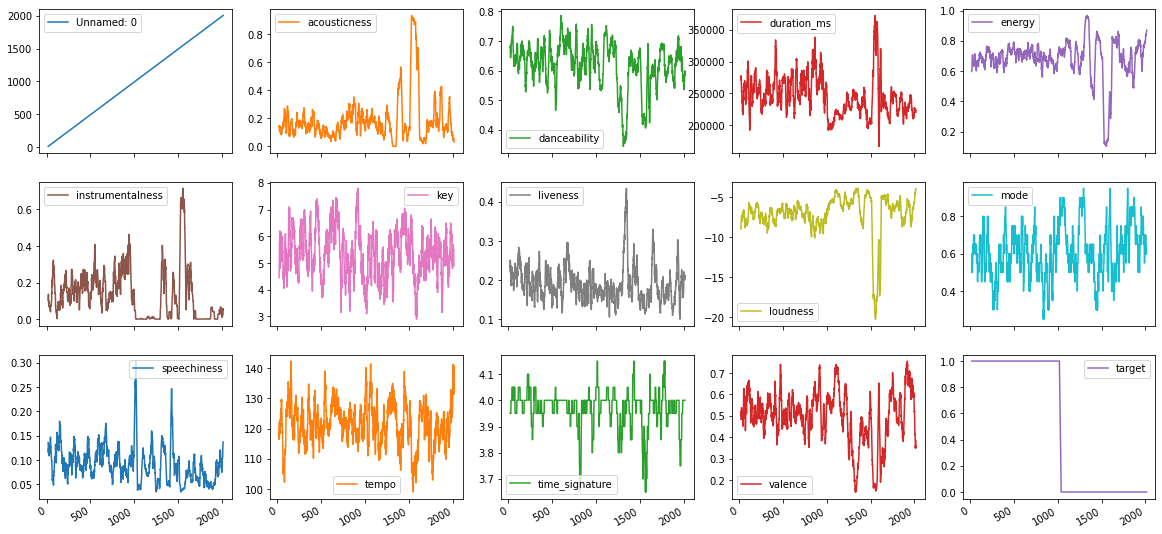

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
attributes_spotify.rolling(20).mean().plot(subplots=True, legend=True, figsize=(20,10), layout=(3, 5))
plt.show() 

En estos graficos lo que está a la izquierda de la mitad tiene target 1 y lo que está a la derecha tiene target 0. Se ven comportamiento diferentes en la mayoria de las caracteristicas, sobre todo alrededor de 1500, salvo en mode y key. Las canciones alrededor de 1500 son de musica clásica por eso el comportamiento extraño.

Tiro algunas columnas y grafico sin promediar para ver mejor.

<Figure size 432x288 with 0 Axes>

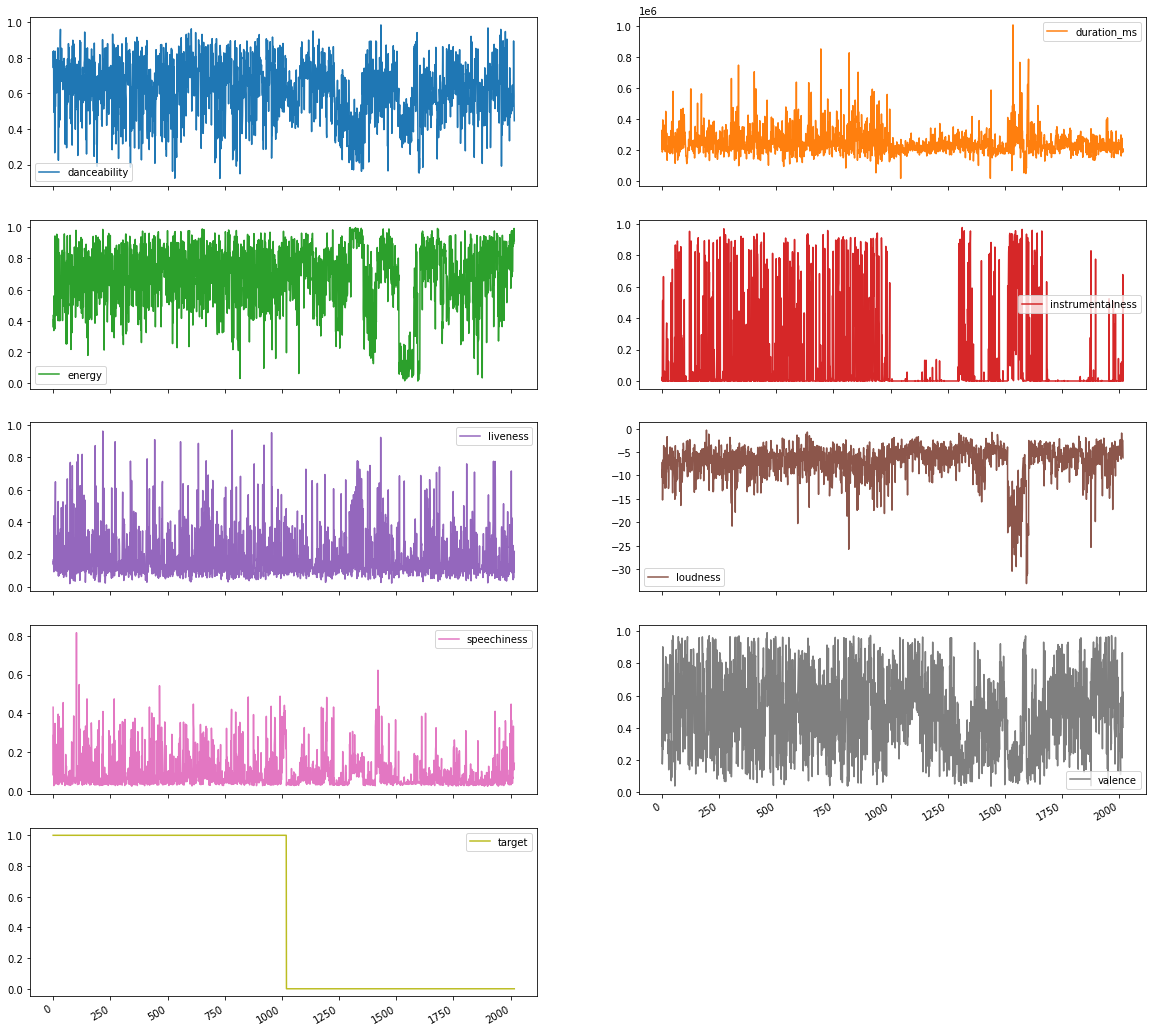

In [101]:
import matplotlib.pyplot as plt

plt.figure()
attributes_spotify.drop(['Unnamed: 0', 'acousticness','mode', 'tempo'
, 'time_signature', 'key'], axis=1).rolling(1).mean().plot(subplots=True, 
legend=True, figsize=(20,20), layout=(5, 2))
plt.show() 

<Figure size 432x288 with 0 Axes>

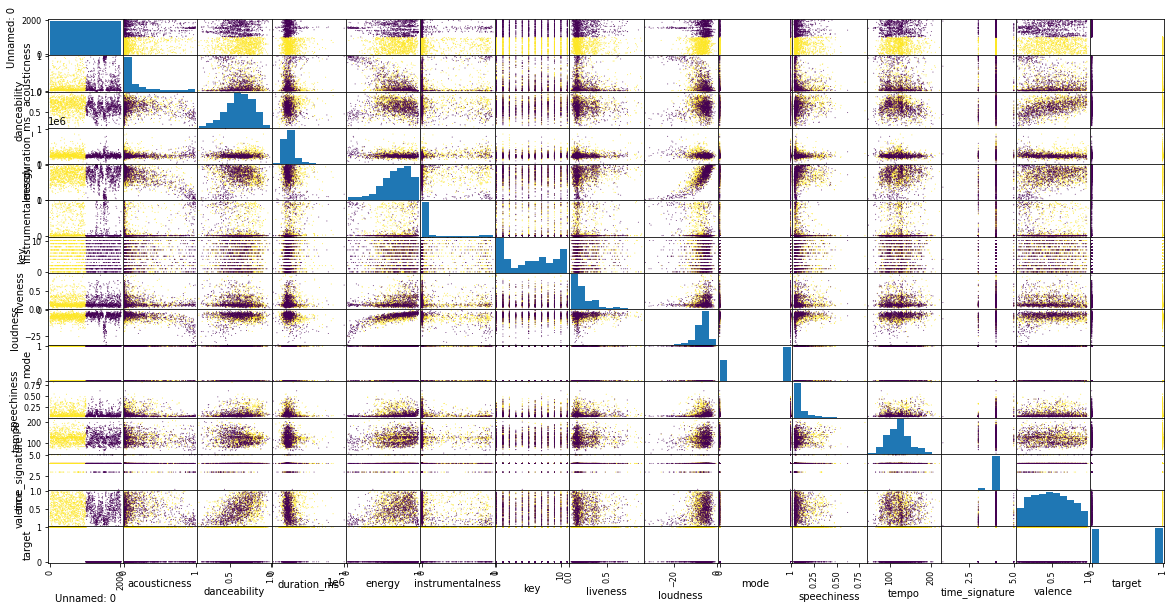

In [ ]:
mask_unlike = attributes_spotify['target'] == 0
mask_like = attributes_spotify['target'] == 1

plt.figure()
pd.plotting.scatter_matrix(attributes_spotify, c=attributes_spotify['target'], figsize=(20,10), marker = 'o', hist_kwds = {'bins': 10}, s = 1, alpha = 0.8)
plt.show()

In [ ]:
attributes_spotify.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

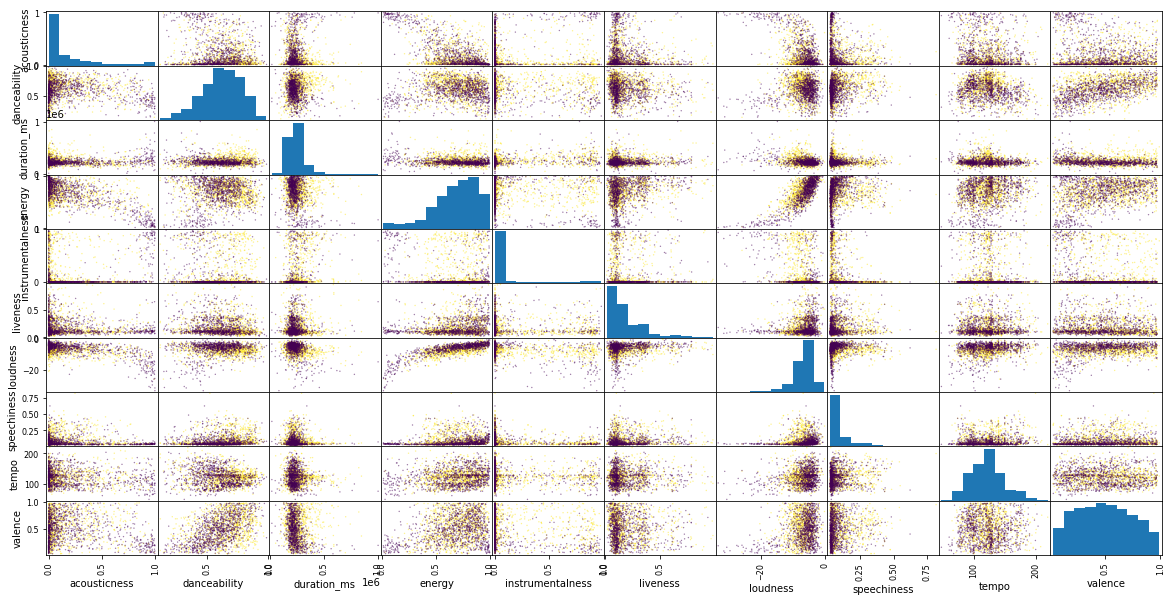

In [ ]:
mask = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence',
       'song_title', 'artist'] #quito algunas columnas al grafico anterior


plt.figure()
pd.plotting.scatter_matrix(attributes_spotify[mask], c=attributes_spotify['target'], 
                           figsize=(20,10), marker = 'o', hist_kwds = {'bins': 10}, 
                           s = 2, alpha = 0.5)
plt.show()

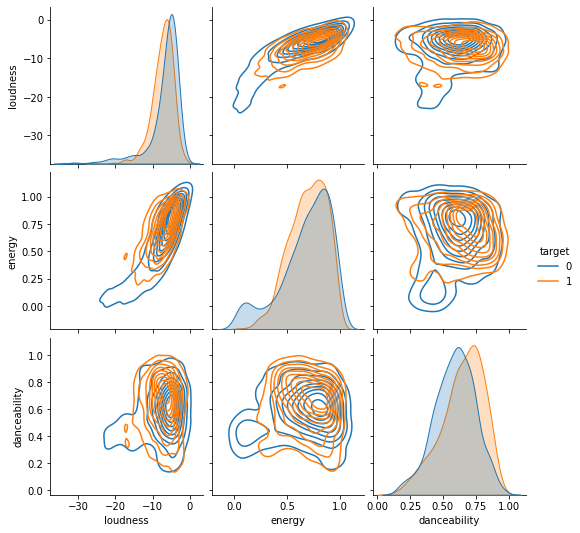

In [ ]:
import seaborn as sns

mask_unlike = attributes_spotify['target'] == 0
mask_like = attributes_spotify['target'] == 1

sns.pairplot(attributes_spotify[['loudness','energy','danceability','target']], hue = 'target', kind='kde')
# g = sns.PairGrid(attributes_spotify[['loudness','energy','danceability','target']], hue = 'target', hue_kws={"cmap": ["Blues", "Reds"]})
# g = g.map_diag(sns.kdeplot, lw=3)
# g = g.map_offdiag(sns.kdeplot, lw=1)
plt.show()

<Figure size 432x288 with 0 Axes>

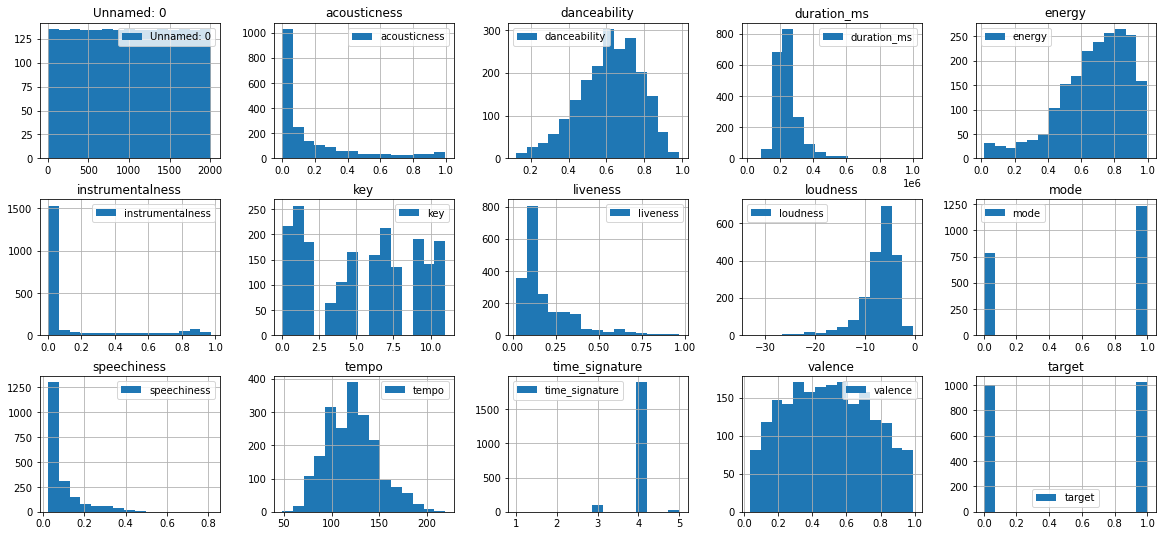

In [ ]:
#Tengo que ver como reescalar los datos. La mayoría están normalizados,
#pero algunos no. Hay varios que tiene una forma la distribucion, pero no
#tienen formas de gaussianas, por lo tanto no creo que se deba estandarizar
#usando el valor z. 

import matplotlib.pyplot as plt

plt.figure()
attributes_spotify.hist(legend=True, figsize=(20,9), layout=(3, 5), bins=15)
plt.show()

  Segun https://scikit-learn.org/stable/modules/preprocessing.html
lo mas comun es estandarizar todo como si fueran gaussianas. Si fuera necesario, en la misma página hay metodos para transformar distribuciones asimetricas en gaussianas. Seguramente seria lo mejor para acousticness, speechiness, energy, etc. No lo hago ahora porque tendria que transformar algunas columnas con un método, y otras con otro. La funcion valencia es mas rara y podría tomarse como uniforme. 


  Seria interesante usar esas transformaciones para convertir los datos todos en gaussianas, o  distribuciones uniformes, y despues hacer histogramas separados para los dos targets, a ver si se ven mejor las diferencias. 

In [58]:
from sklearn.model_selection import train_test_split

df = attributes_spotify.copy()
df = df.drop(['Unnamed: 0','song_title','artist'], axis=1)

X = df.drop(columns=['target']).to_numpy()
y = df['target'].to_numpy()

data_train_sobre_total = 0.5

Tengo entendido que al escalar hay que hacerlo usando solo los datos de entrenamiento,
 para evitar que cierta informacion pase del dataset test al train.
 Pero luego eso habría que hacerlo dentro de gridsearch, por lo que por
ahora ajusto todo el dataset.

In [59]:
from sklearn import preprocessing

#ajusto el escalador a los datos 
scaler = preprocessing.StandardScaler().fit(X)
#reescalo los datos
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total)#, random_state=10)
 #Calculo para diferente cantidad de vecinos, desde 1 hasta sqrt(datos_train)+4

In [ ]:
#Esto seria para transformar la dists asimetricas en gaussianas
# from sklearn import preprocessing

# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

Para escalar dentro de gridsearch hay que usar un pipeline, pero me supera:

https://stackoverflow.com/questions/56707471/how-do-i-a-correctly-use-a-scaler-while-using-gridsearchcv-with-timeseriessplit

<Figure size 432x288 with 0 Axes>

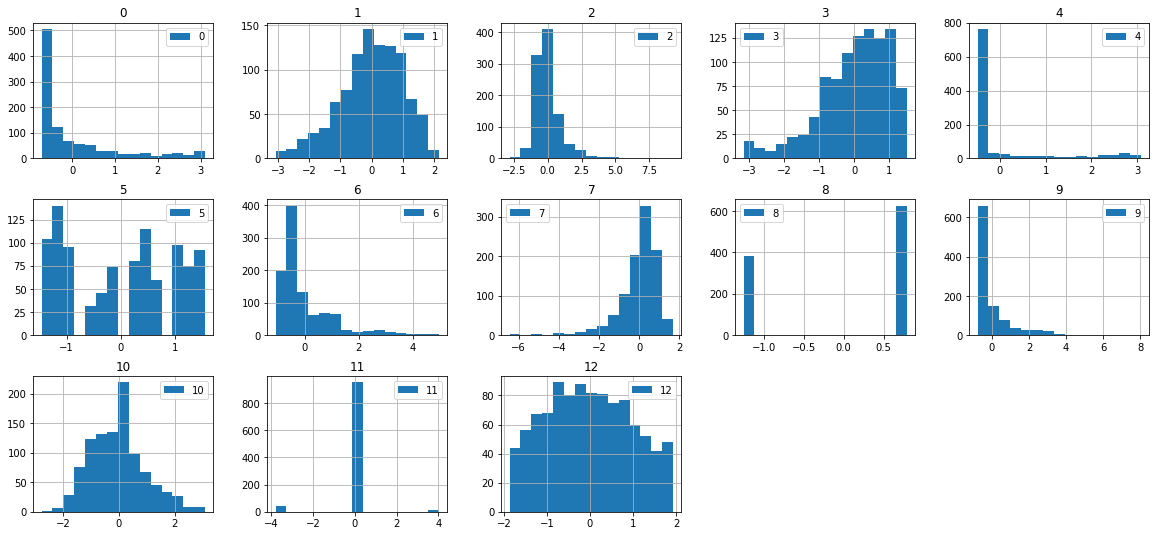

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
pd.DataFrame(X_test).hist(legend=True, figsize=(20,9), layout=(3, 5), bins=15)
plt.show()

Esta parte es un robo del siguiente kaggle:

https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

In [60]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets

#In case of classifier like knn the parameter to be tuned is n_neighbors
#Va a ver cual es el mejor nro de vecinos.
# Para eso hace un dicc.

param_grid = {'n_neighbors':np.arange(1,np.floor( 5 * np.sqrt(y.shape[0] * data_train_sobre_total) ).astype('int'),1)}

In [74]:
knn = KNeighborsClassifier()
#Aparentemente acá le dice a GridSearch que haga knn, 
#pasandole los valores de n_neighbors que necesita knn
# del dicc param_grid, y ¿cv=5? Cantidad de particiones.

k_folds = 5 #numero de folds

knn_cv= GridSearchCV(knn,param_grid,cv=k_folds)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  3...
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135

In [75]:
#Ahora se fija cual fue la mejor accuracy
print('best acc',knn_cv.best_score_)
#y ahora con cuantos vecinos se dio
knn_cv.best_params_

best acc 0.6524371667936024


{'n_neighbors': 34}

No convence mucho, ni se fija si hay una diferencia real con cualquier otro nro de vecinos.

In [79]:
resultados = pd.DataFrame(knn_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004399,0.001587,0.026393,0.000894,1,{'n_neighbors': 1},0.683168,0.608911,0.533499,0.672457,0.625310,0.624669,0.053416,156
1,0.004131,0.000659,0.028801,0.001198,2,{'n_neighbors': 2},0.670792,0.594059,0.535980,0.622829,0.647643,0.614261,0.046732,157


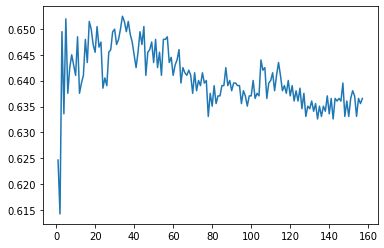

In [80]:
# A ver en porcentajes:
# plt.plot(resultados.param_n_neighbors, resultados.std_test_score/resultados.std_test_score.max())
# plt.plot(resultados.param_n_neighbors, resultados.mean_test_score/resultados.mean_test_score.max())
plt.plot(resultados.param_n_neighbors, resultados.mean_test_score)
# plt.ylim((0,1.1))

Practicamente es lo mismo desde 1 hasta 50, luego se ve una tendencia 
a caer.

In [81]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,np.floor( 5 * np.sqrt(y.shape[0] * data_train_sobre_total) ).astype('int'),1)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


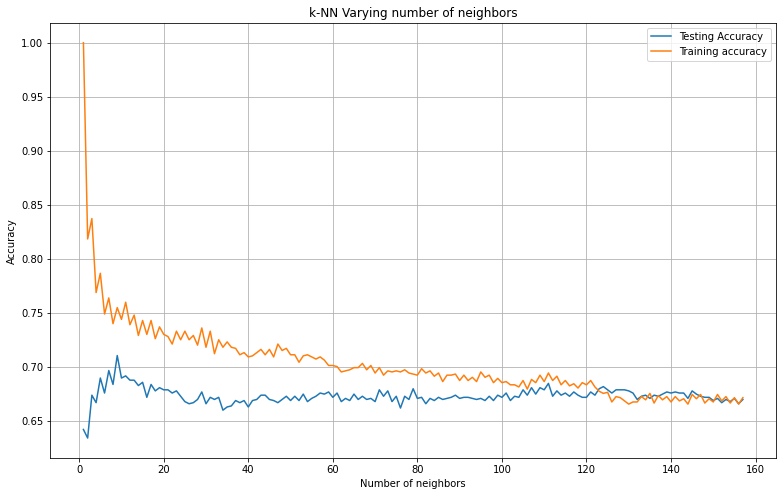

In [84]:
#Generate plot
plt.figure(figsize=(13,8))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
# plt.xlim((0,15))
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


Grafico test accuracy en porcentaje de su maximo valor.

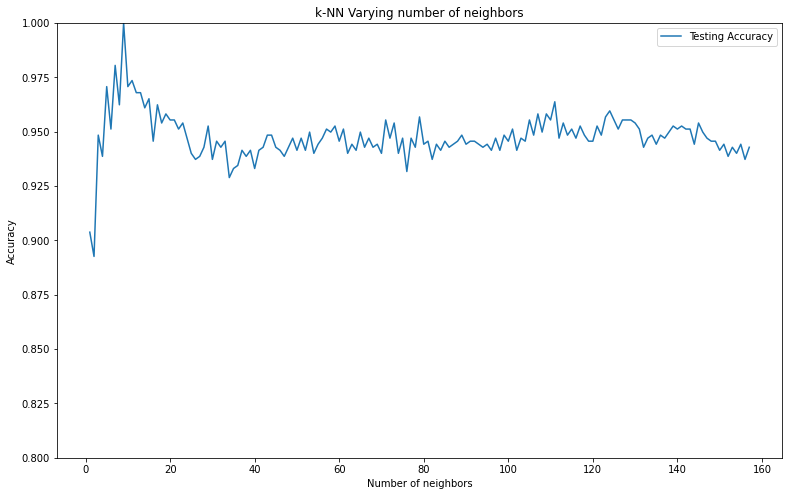

In [83]:
#Generate plot
plt.figure(figsize=(13,8))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy/test_accuracy.max(), label='Testing Accuracy')
plt.legend()
plt.ylim((0.8,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Este gráfico se ve distinto al anterior.

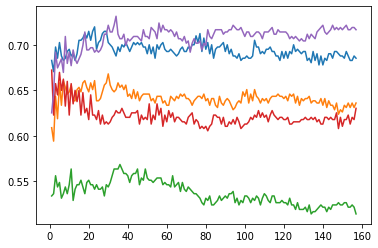

In [70]:
plt.figure()
plt.plot(resultados.param_n_neighbors,resultados[['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']])
plt.show()

<Figure size 432x288 with 0 Axes>

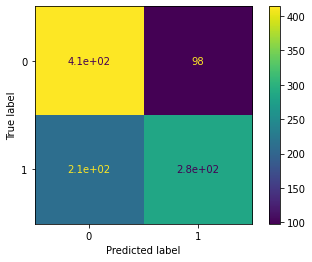

In [49]:
from sklearn import metrics
knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
# knn_best = KNeighborsClassifier(n_neighbors = 23)

knn_best = knn_best.fit(X_train, y_train)
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(knn_best, X_test, y_test)
plt.show()

Se ve que ha un gran numero de FN, y un num imp de FP tmb.

In [86]:
knn = KNeighborsClassifier()
#Aparentemente acá le dice a GridSearch que haga knn, 
#pasandole los valores de n_neighbors que necesita knn
# del dicc param_grid, y ¿cv=5? Cantidad de particiones.

knn_cv= GridSearchCV(knn,param_grid, cv=k_folds, scoring = ['accuracy', 'precision', 'recall', 'f1', 'jaccard'], refit=False)
# knn_cv= GridSearchCV(knn,param_grid, cv=k_folds, scoring = 'f1')
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  3...
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148

In [87]:
resultados = pd.DataFrame(knn_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_jaccard,split1_test_jaccard,split2_test_jaccard,split3_test_jaccard,split4_test_jaccard,mean_test_jaccard,std_test_jaccard,rank_test_jaccard
0,0.003877,0.000816,0.030691,0.005326,1,{'n_neighbors': 1},0.683168,0.608911,0.533499,0.672457,0.625310,0.624669,0.053416,156,0.704301,0.618557,0.533898,0.683673,0.623256,0.632737,0.059626,157,0.642157,0.588235,0.617647,0.656863,0.656863,0.632353,0.026307,3,0.671795,0.603015,0.572727,0.67000,0.639618,0.631431,0.038568,6,0.505792,0.431655,0.401274,0.503759,0.470175,0.462531,0.04083,6
1,0.003546,0.000538,0.030269,0.001110,2,{'n_neighbors': 2},0.670792,0.594059,0.535980,0.622829,0.647643,0.614261,0.046732,157,0.838095,0.666667,0.557823,0.720339,0.742188,0.705022,0.092155,133,0.431373,0.392157,0.401961,0.416667,0.465686,0.421569,0.025753,157,0.569579,0.493827,0.467236,0.52795,0.572289,0.526176,0.041313,157,0.398190,0.327869,0.304833,0.358650,0.400844,0.358077,0.03791,157


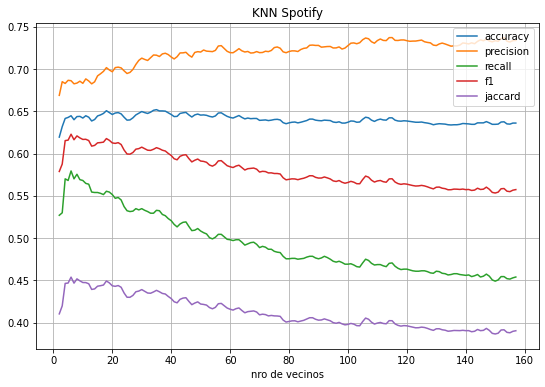

In [99]:
#reviso que pasa con 'precision', 'recall', 'f1' para los distintos numeros
#de vecinos

#Tienen un ruido extraño de largo periodo los gráficos asique les 
#hago una rolling mean de 2 datos.

plt.figure(figsize=(9,6))
for i in ['accuracy', 'precision', 'recall', 'f1', 'jaccard']:
  plt.plot(resultados.param_n_neighbors,resultados['mean_test_'+i].rolling(2).mean(), label=i)
plt.legend()
plt.title('KNN Spotify')
plt.xlabel('nro de vecinos')
# plt.xlim((0,25))
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

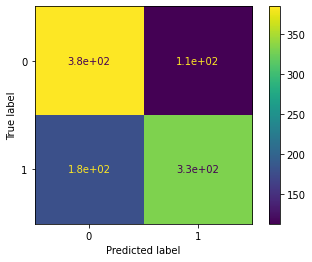

In [98]:
from sklearn import metrics
# knn_best = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn_best = KNeighborsClassifier(n_neighbors = 9)

knn_best = knn_best.fit(X_train, y_train)
plt.figure()
matriz_conf_1 = metrics.plot_confusion_matrix(knn_best, X_test, y_test)
plt.show()

Con un numero alto de vecinos sigue haciendo una gran cantidad de FN.

No se si algo ha salido mal porque lo mejor que obtengo es menor a 70% en los scores.

No se si es comun que caigan así recall y f1 dsp de los 3 vecinos.

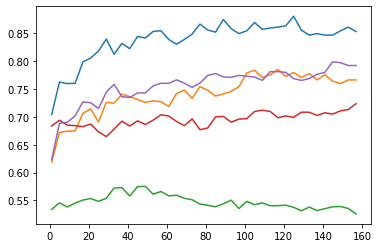

In [53]:
#reviso los distintos splits por separado para ver como se comportan
plt.figure()
for i in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(i)+'_test_precision'])
plt.show()

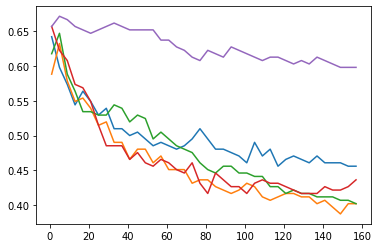

In [54]:
plt.figure()
for i in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(i)+'_test_recall'])
plt.show()

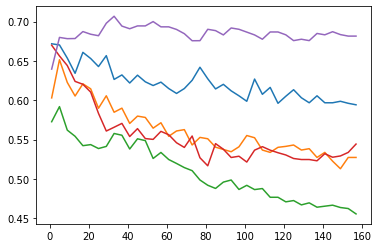

In [55]:
plt.figure()
for i in np.arange(k_folds):
  plt.plot(resultados.param_n_neighbors,resultados['split'+str(i)+'_test_f1'])
plt.show()